In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('inflation fed funds.csv')

In [12]:
print(df.head())

         DATE  FEDFUNDS  CPIAUCSL_PC1
0  1970-01-01      8.57       6.22578
1  1970-04-01      7.88       6.03848
2  1970-07-01      6.70       5.68597
3  1970-10-01      5.57       5.60000
4  1971-01-01      3.86       4.81102


In [13]:
df['FedFunds_Change'] = df.FEDFUNDS.diff() 
df.dropna(inplace=True)

In [14]:
print(df.tail())

           DATE  FEDFUNDS  CPIAUCSL_PC1  FedFunds_Change
187  2016-10-01      0.45       1.80295             0.05
188  2017-01-01      0.70       2.56508             0.25
189  2017-04-01      0.95       1.90351             0.25
190  2017-07-01      1.15       1.97424             0.20
191  2017-10-01      1.20       2.11581             0.05


In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = pd.DataFrame(df.CPIAUCSL_PC1)
y = list(df.FEDFUNDS)

lm.fit(X,y)
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [0.99918089]
intercept: 1.2073164865356478
score: 0.5755449111613605


For every 1 percentage point increase in CPI inflation, Fed Fund Rate will increase by near 1 ppt. Seems like a pretty linear relationship!

df.index = pd.to_datetime(df.DATE)
df[['CPIAUCSL_PC1', 'FEDFUNDS']].plot()
plt.title('CPI, FedFunds')
plt.show()

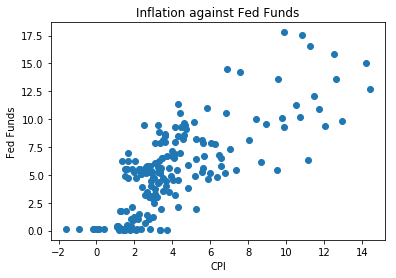

In [20]:
plt.scatter(x = df.CPIAUCSL_PC1, y = df.FEDFUNDS)
plt.title('Inflation against Fed Funds')
plt.xlabel('CPI')
plt.ylabel('Fed Funds')
plt.show()

Fed will raise rates when inflation goes up. 
Even while CPI increases, Fed Fund Rate stays near 0 (not below) because there isn't a negative interest rate policy.

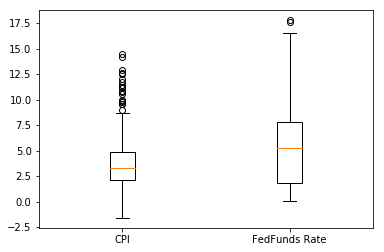

In [22]:
plt.boxplot([df.CPIAUCSL_PC1, df.FEDFUNDS])
plt.xticks([1,2], ['CPI','FedFunds Rate'])
plt.show()

CPI shows a higher number of outliers. 

In [24]:
from sklearn.linear_model import TheilSenRegressor
tsr = TheilSenRegressor()

tsr.fit(X,y)
print('coefficients: ' + str(tsr.coef_))
print('intercept: ' + str(tsr.intercept_))
print('score: ' + str(tsr.score(X,y)))

coefficients: [1.16217623]
intercept: 0.19722761983818937
score: 0.5523697207690508


TheilSen Regressor shows 1.16% increase in CPI leads to a 1% increase in Fed Funds Rate. ThielSen works well for errors in the input.

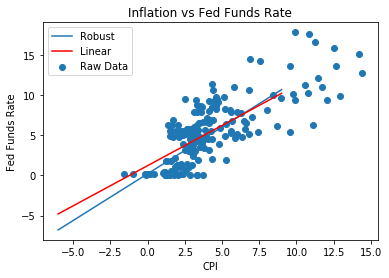

In [27]:
robust = [tsr.coef_[0] * i + tsr.intercept_ for i in range(-6, 10)]
linear = [lm.coef_[0] * i + lm.intercept_ for i in range(-6, 10)]

plt.scatter(x = df.CPIAUCSL_PC1, y = df.FEDFUNDS, label='Raw Data')
plt.plot(range(-6,10), robust, label='Robust')
plt.plot(range(-6,10), linear, 'r', label='Linear')
plt.legend()
plt.title('Inflation vs Fed Funds Rate')
plt.xlabel('CPI')
plt.ylabel('Fed Funds Rate')
plt.show()

In [25]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()

hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [0.99491514]
intercept: 1.076639855933661
score: 0.574105812152363


Huber Regressor shows 0.995% increase in CPI leads to a 1% increase in Fed Funds Rate. Huber weighting offers us a way to limit the impact of outliers while still extracting information from them.